In [2]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 50.6 MB/s eta 0:00:00


In [4]:
!wget https://ultralytics.com/images/bus.jpg -O car.jpg


--2026-01-30 07:19:27--  https://ultralytics.com/images/bus.jpg
Resolving ultralytics.com (ultralytics.com)... 198.202.211.1
Connecting to ultralytics.com (ultralytics.com)|198.202.211.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.ultralytics.com/images/bus.jpg [following]
--2026-01-30 07:19:27--  https://www.ultralytics.com/images/bus.jpg
Resolving www.ultralytics.com (www.ultralytics.com)... 198.202.211.1, 2620:cb:2000::1
Connecting to www.ultralytics.com (www.ultralytics.com)|198.202.211.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/ultralytics/assets/releases/download/v0.0.0/bus.jpg [following]
--2026-01-30 07:19:27--  https://github.com/ultralytics/assets/releases/download/v0.0.0/bus.jpg
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Loc

In [5]:
!ls


car.jpg  sample_data


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/car.jpg: 640x480 3 persons, 1 bus, 358.5ms
Speed: 17.4ms preprocess, 358.5ms inference, 39.6ms postprocess per image at shape (1, 3, 640, 480)


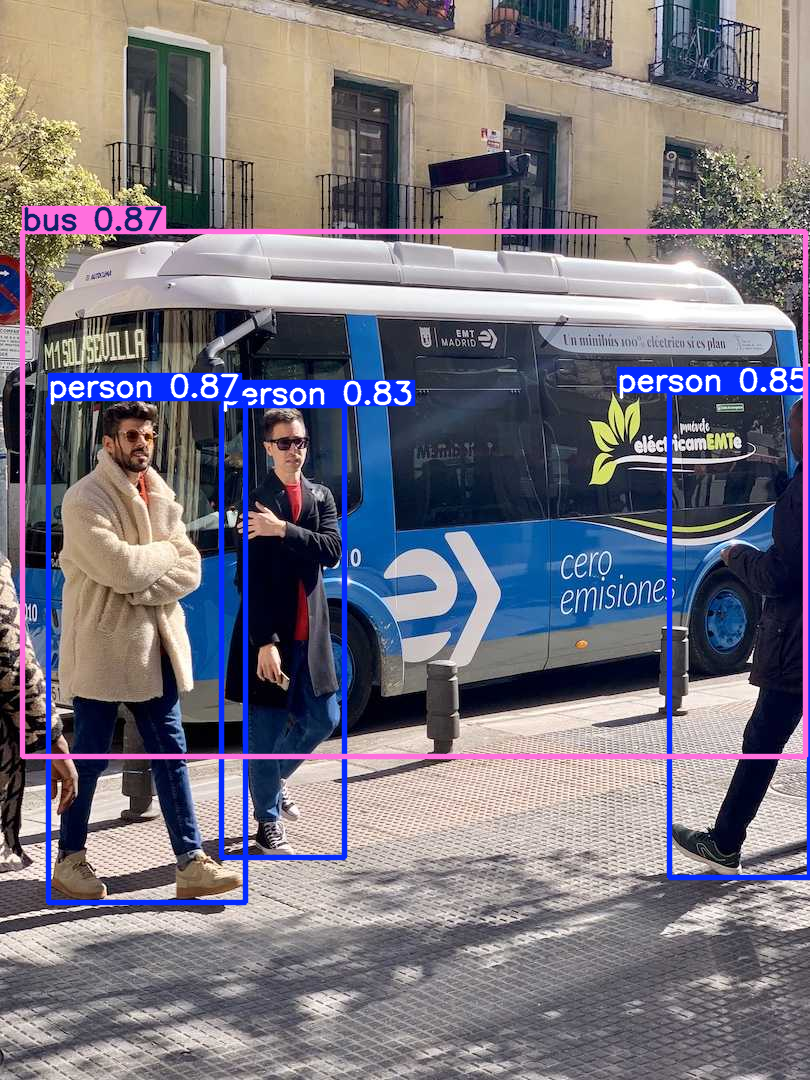

In [6]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

# Load YOLOv8 model (auto-downloads)
model = YOLO("yolov8n.pt")

# Run detection
results = model("car.jpg", conf=0.4)

# Get annotated image
annotated_img = results[0].plot()

# Show image
cv2_imshow(annotated_img)


In [7]:
!pip install ultralytics easyocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.2/978.2 kB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 23.1 MB/s eta 0:00:00


In [8]:
!wget https://raw.githubusercontent.com/keremberke/yolov8-license-plate-detection/main/assets/test.jpg -O car_plate.jpg


--2026-01-30 07:32:35--  https://raw.githubusercontent.com/keremberke/yolov8-license-plate-detection/main/assets/test.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2026-01-30 07:32:35 ERROR 404: Not Found.



In [9]:
!ls


car.jpg  car_plate.jpg	sample_data  yolov8n.pt


In [11]:
!pip install ultralytics easyocr opencv-python


In [12]:
!wget https://raw.githubusercontent.com/openalpr/benchmarks/master/endtoend/us-traffic.jpg -O car_plate.jpg


--2026-01-30 07:35:38--  https://raw.githubusercontent.com/openalpr/benchmarks/master/endtoend/us-traffic.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2026-01-30 07:35:38 ERROR 404: Not Found.



In [13]:
from ultralytics.utils import ASSETS
print(ASSETS)


/usr/local/lib/python3.12/dist-packages/ultralytics/assets


In [14]:
import os
from ultralytics.utils import ASSETS

print(os.listdir(ASSETS))


['zidane.jpg', 'bus.jpg']


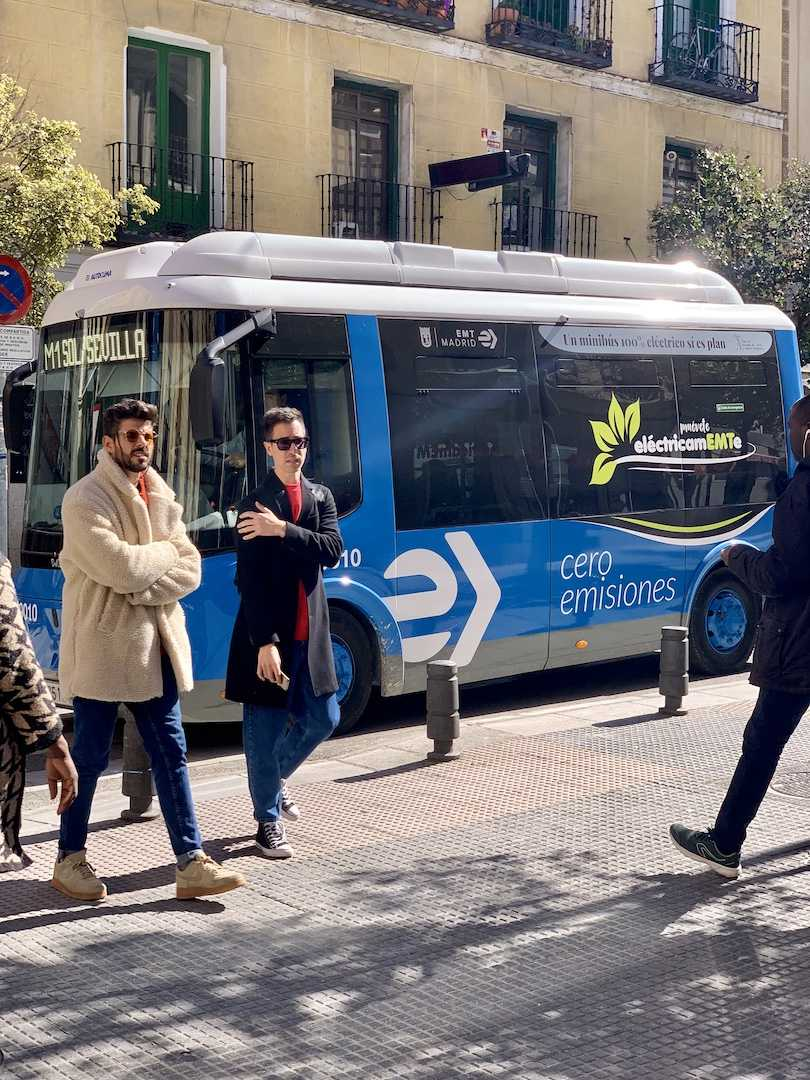

In [15]:
import cv2
from ultralytics.utils import ASSETS
from google.colab.patches import cv2_imshow

img_path = str(ASSETS / "bus.jpg")
img = cv2.imread(img_path)

cv2_imshow(img)



0: 640x480 3 persons, 1 bus, 179.0ms
Speed: 4.1ms preprocess, 179.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


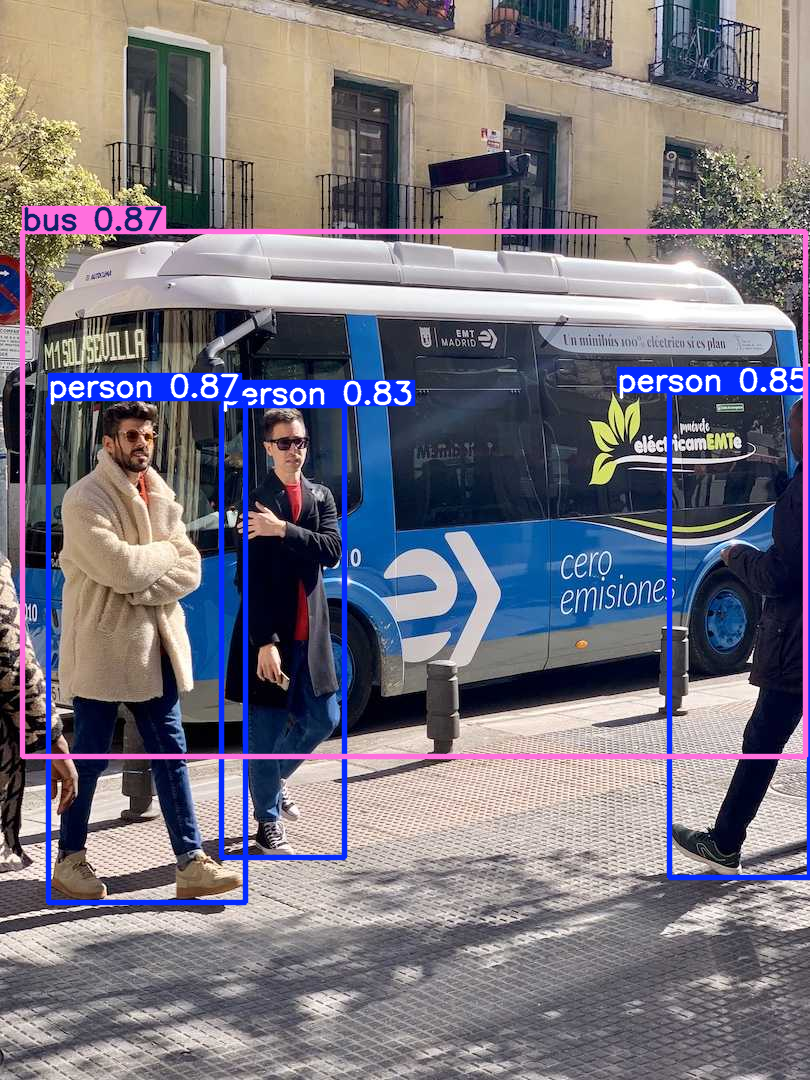

In [16]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
results = model(img, conf=0.4)

annotated = results[0].plot()
cv2_imshow(annotated)


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


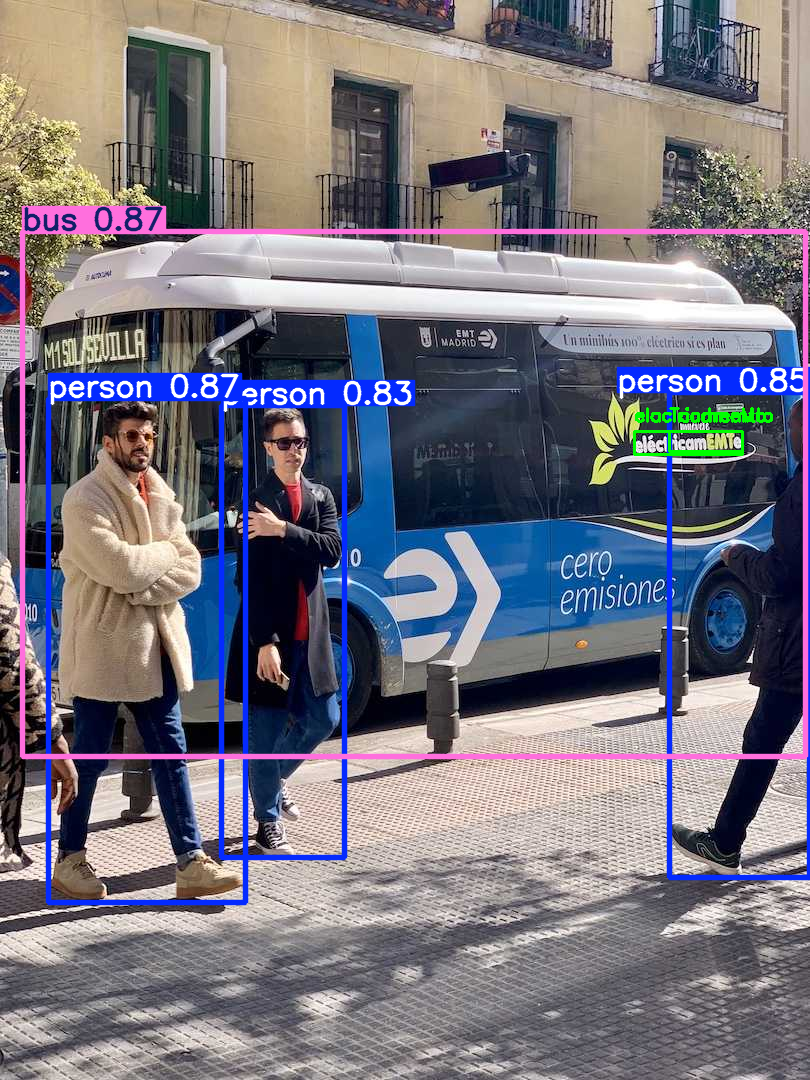

In [17]:
import easyocr

reader = easyocr.Reader(['en'])
annotated = results[0].plot()

for box in results[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    crop = img[y1:y2, x1:x2]

    gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)

    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        aspect = w / float(h)

        # Plate-like shape
        if 2 < aspect < 6 and w > 60:
            plate = crop[y:y+h, x:x+w]
            text = reader.readtext(plate, detail=0)

            if text:
                cv2.rectangle(annotated, (x1+x, y1+y), (x1+x+w, y1+y+h), (0,255,0), 2)
                cv2.putText(
                    annotated,
                    text[0],
                    (x1+x, y1+y-10),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.6,
                    (0,255,0),
                    2
                )
                break

cv2_imshow(annotated)
